In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# reading csv files

reviews = pd.read_csv('olist_order_reviews_dataset.csv')# primary table
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments=pd.read_csv('olist_order_payments_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
product_name_translation=pd.read_csv('product_category_name_translation.csv')

In [3]:
print("reviews_shape : " , reviews.shape)
print("orders_shape : " , orders.shape)
print("customers_shape : " , customers.shape)
print("payments_shape : " , payments.shape)
print("order_items_shape : " , order_items.shape)
print("products_shape : " , products.shape)
print("product_name_shape : " , product_name_translation.shape)

reviews_shape :  (99224, 7)
orders_shape :  (99441, 8)
customers_shape :  (99441, 5)
payments_shape :  (103886, 5)
order_items_shape :  (112650, 7)
products_shape :  (32951, 9)
product_name_shape :  (71, 2)


In [4]:
merged1 = pd.merge(reviews,orders,on='order_id', how='inner')
merged2 = pd.merge(merged1,payments, on='order_id', how='inner')
merged3 = pd.merge(merged2, customers, on='customer_id', how='inner')
merged4=pd.merge(merged3,order_items,on='order_id',how='inner')
merged5=pd.merge(merged4,products,on='product_id',how='inner')
merged6=pd.merge(merged5,product_name_translation,on='product_category_name',how='inner')

In [5]:
df=merged6
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      115609 non-null  object 
 1   order_id                       115609 non-null  object 
 2   review_score                   115609 non-null  int64  
 3   review_comment_title           13801 non-null   object 
 4   review_comment_message         48906 non-null   object 
 5   review_creation_date           115609 non-null  object 
 6   review_answer_timestamp        115609 non-null  object 
 7   customer_id                    115609 non-null  object 
 8   order_status                   115609 non-null  object 
 9   order_purchase_timestamp       115609 non-null  object 
 10  order_approved_at              115595 non-null  object 
 11  order_delivered_carrier_date   114414 non-null  object 
 12  order_delivered_customer_date 

In [6]:
df.nunique()

review_id                        96319
order_id                         96516
review_score                         5
review_comment_title              4466
review_comment_message           35172
review_creation_date               632
review_answer_timestamp          87117
customer_id                      96516
order_status                         7
order_purchase_timestamp         86415
order_approved_at                49475
order_delivered_carrier_date     60487
order_delivered_customer_date    74373
order_estimated_delivery_date      449
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28657
customer_unique_id               93396
customer_zip_code_prefix         14907
customer_city                     4093
customer_state                      27
order_item_id                       21
product_id                       32171
seller_id                         3028
shipping_limit_date      

In [7]:
df.isnull().sum()

review_id                             0
order_id                              0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0


In [8]:
df.fillna(0, inplace=True)
df.isnull().sum()

review_id                        0
order_id                         0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_nam

# Univariate analysis

In [9]:
 df['review_score'].describe()

count    115609.000000
mean          4.034409
std           1.385584
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

In [10]:
#Calculating the count of each review score 
review_score_count = df['review_score'].value_counts()
review_score_count

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64

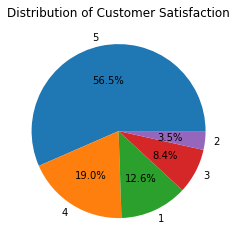

In [11]:
# Check the distribution of customer satisfaction ratings
plt.pie(review_score_count, labels=review_score_count.index, autopct='%1.1f%%')
plt.title('Distribution of Customer Satisfaction')
plt.show()

In [12]:
# Univaria/te analysis of the 'customer_state' variable
city_counts = customers['customer_city'].value_counts()
city_counts

sao paulo           15540
rio de janeiro       6882
belo horizonte       2773
brasilia             2131
curitiba             1521
                    ...  
sarutaia                1
suzanapolis             1
candido godoi           1
nova roma do sul        1
olaria                  1
Name: customer_city, Length: 4119, dtype: int64

In [13]:
# Univaria/te analysis of the 'customer_state' variable
state_counts = customers['customer_state'].value_counts()
state_counts

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [14]:
df["customer_state"].describe()

count     115609
unique        27
top           SP
freq       48797
Name: customer_state, dtype: object

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


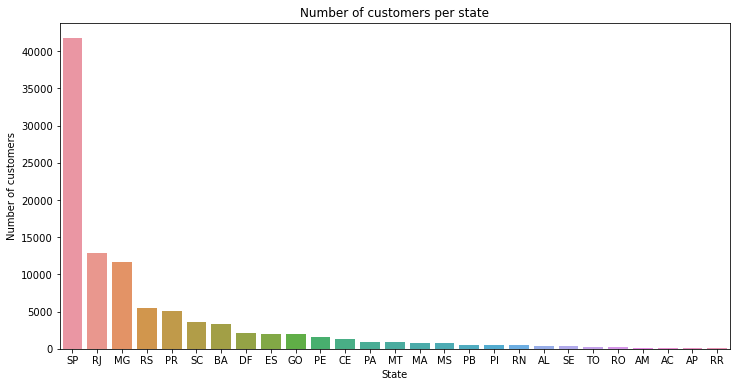

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(state_counts.index, state_counts.values)

plt.title('Number of customers per state')
plt.xlabel('State')
plt.ylabel('Number of customers')
plt.show() 

In [16]:
df["product_category_name_english"].describe()

count             115609
unique                71
top       bed_bath_table
freq               11847
Name: product_category_name_english, dtype: object

In [17]:
 # Univariate analysis of the 'product_category_name_english' variable
category_counts = df['product_category_name_english'].value_counts()
category_counts

bed_bath_table               11847
health_beauty                 9944
sports_leisure                8942
furniture_decor               8743
computers_accessories         8105
                             ...  
arts_and_craftmanship           24
la_cuisine                      15
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


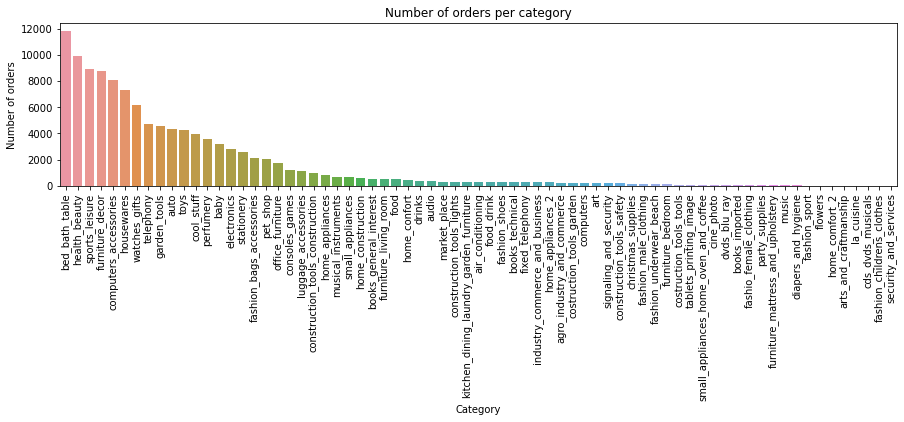

In [18]:
plt.figure(figsize=(15,3))
sns.barplot(category_counts.index, category_counts.values)
plt.title('Number of orders per category')
plt.xlabel('Category')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)
plt.show()

In [19]:
df["price"].describe()

count    115609.000000
mean        120.619850
std         182.653476
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

the price refers to the unit price of a product or service, while the payment value refers to the total amount paid by the customer for that product or service, which may include additional fees such as shipping, taxes, or discounts.

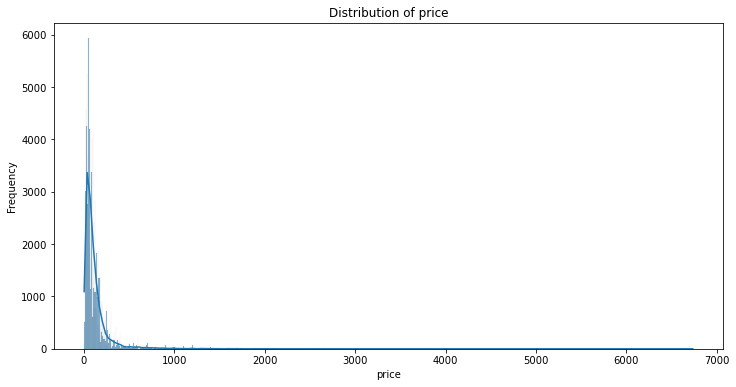

In [20]:
 # Univariate analysis of the 'price' variable
plt.figure(figsize=(12,6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [21]:
 df['payment_value'].describe()

count    115609.000000
mean        172.387379
std         265.873969
min           0.000000
25%          60.870000
50%         108.050000
75%         189.480000
max       13664.080000
Name: payment_value, dtype: float64

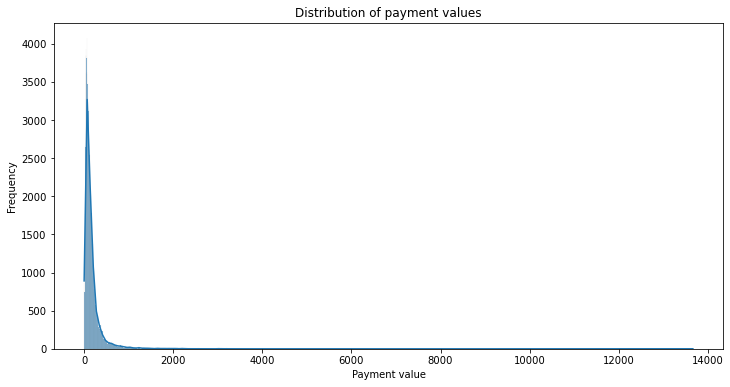

In [22]:
# Univariate analysis of the 'payment_value' variable
plt.figure(figsize=(12,6))
sns.histplot(df['payment_value'], kde=True)
plt.title('Distribution of payment values')
plt.xlabel('Payment value')
plt.ylabel('Frequency')
plt.show()

In [23]:
df['price']

0          185.00
1          185.00
2          185.00
3          185.00
4         1199.00
           ...   
115604      19.00
115605      39.90
115606      16.49
115607     183.29
115608     100.00
Name: price, Length: 115609, dtype: float64

In [24]:
# Summary statistics for the 'price' variable
df['price'].describe()



count    115609.000000
mean        120.619850
std         182.653476
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [25]:
# mean provide insights into the average price of the product.
#standard deviation can provide insights into the variability or spread of prices.
# quarile values can be useful in identifying the price ranges in which most products fall.

In [26]:
# Summary statistics for the 'payment_value' variable
df['payment_value'].describe()

count    115609.000000
mean        172.387379
std         265.873969
min           0.000000
25%          60.870000
50%         108.050000
75%         189.480000
max       13664.080000
Name: payment_value, dtype: float64

In [27]:
df['payment_type'].describe()

count          115609
unique              4
top       credit_card
freq            85278
Name: payment_type, dtype: object

In [28]:
#payment type 
payment_type_count = df['payment_type'].value_counts()
payment_type_count 

credit_card    85278
boleto         22510
voucher         6162
debit_card      1659
Name: payment_type, dtype: int64

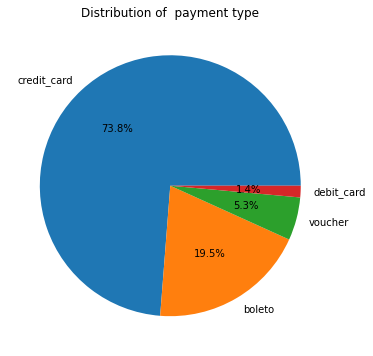

In [29]:
plt.figure(figsize=(12,6))
plt.pie(x=payment_type_count, labels=payment_type_count.index, autopct='%1.1f%%')
plt.title('Distribution of  payment type')
plt.show() 

How many orders we have for each status?

In [30]:
# Count the number of orders for each status
order_status_counts =df['order_status'].value_counts()

# Print the result
print(order_status_counts)

delivered      113210
shipped          1138
canceled          536
invoiced          358
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64


In [31]:
 # we can see the highest amount of orders are delivered 

# Bivariate Analysis 

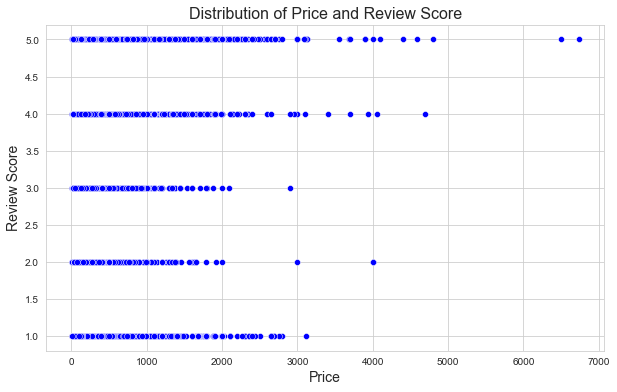

In [32]:
# Plot a scatterplot between price and review_score_rating
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.title('Distribution of Price and Review Score', fontsize=16)
sns.scatterplot(data=df, x='price', y='review_score', color='blue')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Review Score', fontsize=14)
plt.show()

 By analyzing this plot, we can see if there is any correlation between the price of the product and the review score.
 if there is a cluster of data points with high review scores and high prices, it may indicate that customers are willing to pay more for products that meet their expectations. Similarly, if there is a cluster of data points with low review scores and low prices, it may indicate that customers have low expectations for cheaper products.

In [33]:
# Create a pivot table to show the average payment value by payment type and review score
pivot_df = pd.pivot_table(df, index='payment_type', columns='review_score', values='payment_value', aggfunc='mean')

In [34]:
pivot_df

review_score,1,2,3,4,5
payment_type,,,,,
boleto,279.468277,202.337417,163.204478,167.626368,157.804216
credit_card,234.487044,199.604674,177.953305,170.030707,169.275782
debit_card,154.441034,142.898654,145.820163,155.762633,149.059970
voucher,76.992644,70.351004,62.374554,62.808089,61.732748


In [35]:
 # Group the data by payment type and review score rating
grouped_data = df.groupby(['payment_type', 'review_score']).size().reset_index(name='count')

In [36]:
grouped_data

,payment_type,review_score,count
0,boleto,1,2827
1,boleto,2,755
2,boleto,3,1963
3,boleto,4,4358
4,boleto,5,12607
5,credit_card,1,10766
6,credit_card,2,2944
7,credit_card,3,7105
8,credit_card,4,16152
9,credit_card,5,48311


In [37]:
# Pivot the data to create a heatmap
pivoted_data = grouped_data.pivot(index='payment_type', columns='review_score', values='count')

In [38]:
# Normalize the data to percentages
pivoted_data = pivoted_data.div(pivoted_data.sum(axis=1), axis=0) * 100

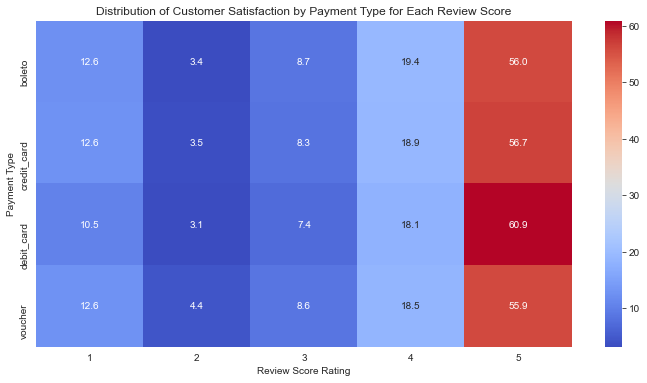

In [39]:
# Create a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivoted_data, annot=True, fmt='.1f', cmap='coolwarm')
# Add title and axis labels
plt.title('Distribution of Customer Satisfaction by Payment Type for Each Review Score')
plt.xlabel('Review Score Rating')
plt.ylabel('Payment Type')
plt.show()

<AxesSubplot:xlabel='payment_type', ylabel='review_score'>

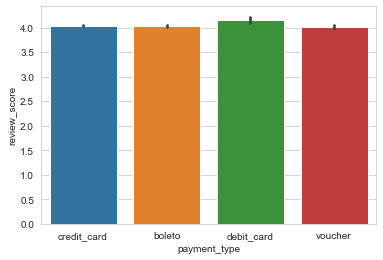

In [40]:
# Create a bar chart of payment types vs. review scores
sns.barplot(x='payment_type', y='review_score', data=df)


Check the distribution of customer satisfaction by month :

1)  how customer satisfaction levels vary over time


2) how seasonal changes or specific events affect customer satisfaction levels.

In [41]:
# Group the data by month and calculate the mean satisfaction score
# Convert the order date to a datetime object and extract the month
df['order_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.strftime('%Y-%m')
satisfaction_by_month = df.groupby('order_month')['review_score'].mean().reset_index()

In [42]:
satisfaction_by_month

,order_month,review_score
0,2016-02,1.000000
1,2016-03,3.000000
2,2016-04,3.779221
3,2016-05,3.457627
4,2016-06,3.431034
5,2016-07,3.420000
6,2016-08,3.955556
7,2016-09,3.305556
8,2016-10,3.934783
9,2016-12,5.000000


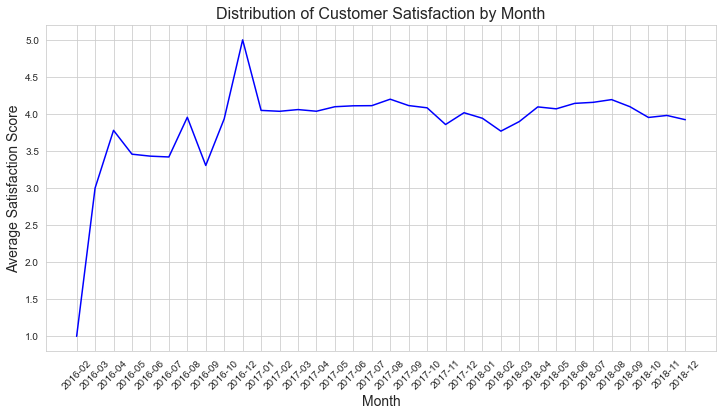

In [43]:
 # Visualize the distribution using a line plot
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.title('Distribution of Customer Satisfaction by Month', fontsize=16)
sns.lineplot(data=satisfaction_by_month, x='order_month', y='review_score', color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Satisfaction Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()

 Is there any growing trend on brazilian e-commerce?

In [44]:
 # Convert the order_purchase_timestamp column to datetime format
 
df['order_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.strftime('%Y-%m')

# Group the data by year_month and count the number of orders
monthly_order_counts = df.groupby('order_month')['order_id'].count().reset_index()

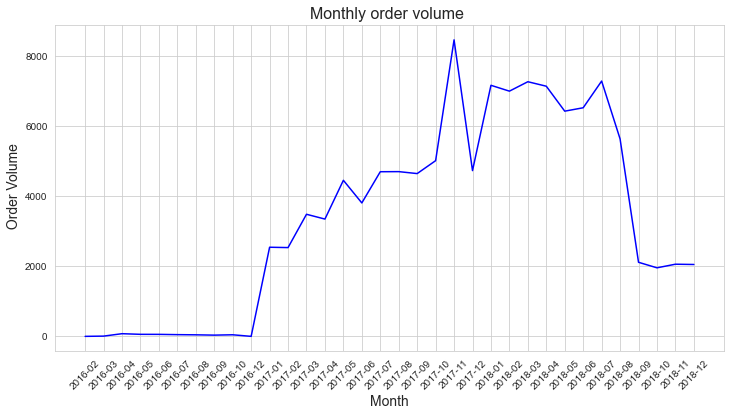

In [45]:
  # Visualize the distribution using a line plot
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.title('Monthly order volume ', fontsize=16)
sns.lineplot(data=monthly_order_counts, x='order_month', y='order_id', color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel(' Order Volume', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [46]:
df['order_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_month']

0         11
1         11
2          3
3          7
4         10
          ..
115604     7
115605     7
115606     8
115607     1
115608     9
Name: order_month, Length: 115609, dtype: int64

On what day of week brazilians customers tend to do online purchasing?

In [47]:
# Create a new column with the day of the week of each order
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['order_day_of_week'] =df['order_purchase_timestamp'].dt.dayofweek+1 # Monday is 0, so add 1 to get 1-based indexing

# Group the data by order_day_of_week and count the number of orders
day_of_week_order_counts =df.groupby('order_day_of_week')['order_id'].count().reset_index()

Text(0.5, 1.0, 'Order Volume by Day of Week')

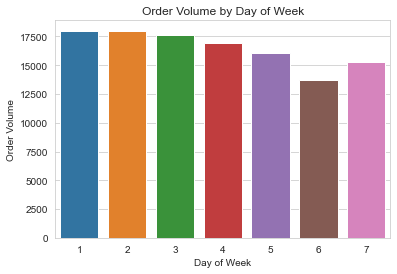

In [48]:
# Create a bar chart of the number of orders by day of the week
sns.barplot(x='order_day_of_week', y='order_id', data=day_of_week_order_counts)
plt.xlabel('Day of Week')
plt.ylabel('Order Volume')
plt.title('Order Volume by Day of Week')

What time brazilians customers tend do buy (Dawn, Morning, Afternoon or Night)?


In [49]:
# Create a new column with the hour of the day of each order
df['order_hour_of_day'] =df['order_purchase_timestamp'].dt.hour

# Group the data by order_hour_of_day and count the number of orders
hour_of_day_order_counts =df.groupby('order_hour_of_day')['order_id'].count().reset_index()

Text(0.5, 1.0, 'Order Volume by Hour of Day')

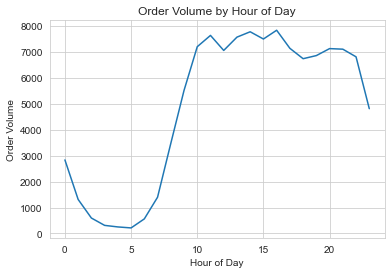

In [50]:
# Create a line chart of the number of orders by hour of the day
sns.lineplot(x='order_hour_of_day', y='order_id', data=hour_of_day_order_counts)
plt.xlabel('Hour of Day')
plt.ylabel('Order Volume')
plt.title('Order Volume by Hour of Day')


 Did the sale grow up over time?

In [51]:
# Group the data by year and month and calculate the total sales for each period
sales_by_month = df.groupby('order_month')['payment_value'].sum().reset_index()

In [52]:
sales_by_month

,order_month,payment_value
0,1,1677348.98
1,2,1622176.95
2,3,1838824.04
3,4,1846567.08
4,5,1951925.48
5,6,1757895.85
6,7,2078563.71
7,8,1653541.01
8,9,1279777.63
9,10,1244821.42


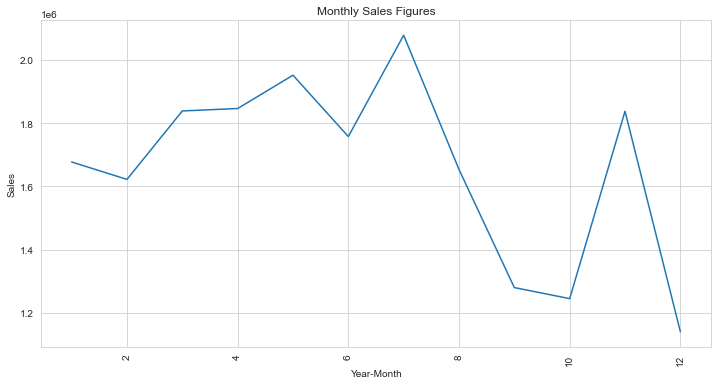

In [53]:
# Plot the monthly sales figures over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month['order_month'], sales_by_month['payment_value'])
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Figures')
plt.show()


How the total sales (sum of price) are concentraded in brazilian states?

In [54]:
state_sales =df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).reset_index()

state_sales

,customer_state,payment_value
0,SP,7502926.95
1,RJ,2708839.33
2,MG,2288949.71
3,RS,1131899.22
4,PR,1055747.81
5,BA,780334.54
6,SC,769744.94
7,GO,459466.06
8,DF,430126.51
9,ES,390840.58


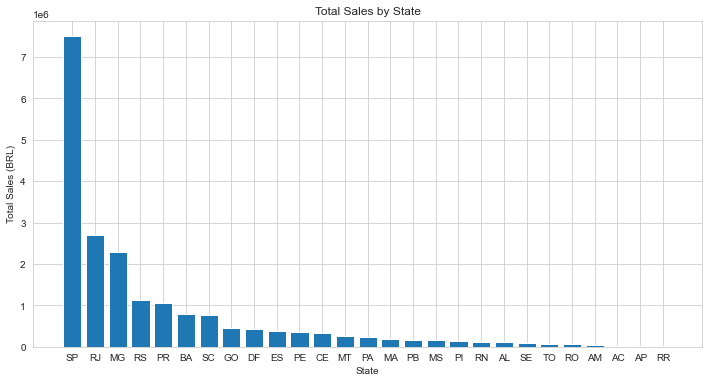

In [55]:
# Plot the total sales by state
plt.figure(figsize=(12, 6))
plt.bar(state_sales['customer_state'], state_sales['payment_value'])
plt.xlabel('State')
plt.ylabel('Total Sales (BRL)')
plt.title('Total Sales by State')
plt.show()

 This will give an idea of how the sales are distributed across different states, and which states are contributing the most to the total sales. 

# Feature Engineering 


In [56]:
df['review_comment_title']=df['review_comment_title'].astype(str)
df['review_comment_message']=df['review_comment_message'].astype(str)

In [57]:
 #converting categorical varaible to numeric 
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['order_id','customer_id','order_status','review_id','review_score','payment_type','customer_unique_id','review_comment_title','review_comment_message','customer_city','customer_state']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
 

In [58]:
# Drop duplicates
df.drop_duplicates(inplace=True) 

In [59]:
print("Total rows:",df.shape[0])
print("Total Columns:",df.shape[1])
print("Unique values:\n\n",df.nunique())
df.info()

Total rows: 115609
Total Columns: 40
Unique values:

 review_id                        96319
order_id                         96516
review_score                         5
review_comment_title              4466
review_comment_message           35172
review_creation_date               632
review_answer_timestamp          87117
customer_id                      96516
order_status                         7
order_purchase_timestamp         86415
order_approved_at                49476
order_delivered_carrier_date     60488
order_delivered_customer_date    74374
order_estimated_delivery_date      449
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28657
customer_unique_id               93396
customer_zip_code_prefix         14907
customer_city                     4093
customer_state                      27
order_item_id                       21
product_id                       32171
seller_id 

In [60]:
# Univaria/te analysis of the 'customer_state' variable
city_counts =df['customer_city'].value_counts()
city_counts

3574    18267
3135     8022
451      3196
556      2434
1139     1790
        ...  
3918        1
3393        1
3790        1
553         1
1308        1
Name: customer_city, Length: 4093, dtype: int64

In [61]:
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_creation_year'] = df['review_creation_date'].dt.year
df['review_creation_month'] = df['review_creation_date'].dt.month
df['review_creation_day'] = df['review_creation_date'].dt.day


In [62]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_year'] = df['order_purchase_timestamp'].dt.year
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.month
df['order_purchase_day'] = df['order_purchase_timestamp'].dt.day
 

In [63]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_approved_year'] = df['order_approved_at'].dt.year
df['order_approved_month'] = df['order_approved_at'].dt.month
df['order_approved_day'] = df['order_approved_at'].dt.day
 

In [64]:
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_carrier_year'] = df['order_delivered_carrier_date'].dt.year
df['order_delivered_carrier_month'] = df['order_delivered_carrier_date'].dt.month
df['order_delivered_carrier_day'] = df['order_delivered_carrier_date'].dt.day
 

In [65]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_estimated_delivery_year'] = df['order_estimated_delivery_date'].dt.year
df['order_estimated_delivery_month'] = df['order_estimated_delivery_date'].dt.month
df['order_estimated_delivery_day'] = df['order_estimated_delivery_date'].dt.day

In [66]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_delivered_customer_year'] = df['order_delivered_customer_date'].dt.year
df['order_delivered_customer_month'] = df['order_delivered_customer_date'].dt.month
df['order_delivered_customer_day'] = df['order_delivered_customer_date'].dt.day

In [67]:
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['review_answer_year'] = df['review_answer_timestamp'].dt.year
df['review_answer_month'] = df['review_answer_timestamp'].dt.month
df['review_answer_day'] = df['review_answer_timestamp'].dt.day
 

In [68]:
# Create a new column for the time taken to deliver the order
df['delivery_time'] = df['order_delivered_customer_day']-df['order_purchase_day']
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_year,order_estimated_delivery_month,order_estimated_delivery_day,order_delivered_customer_year,order_delivered_customer_month,order_delivered_customer_day,review_answer_year,review_answer_month,review_answer_day,delivery_time
0,46641,43703,3,55,194,2018-01-18,2018-01-18 21:46:00,24835,2,2018-11-01 15:30:00,...,2018,2,2,2018,1,17,2018,1,18,16
1,46641,43703,3,55,194,2018-01-18,2018-01-18 21:46:00,24835,2,2018-11-01 15:30:00,...,2018,2,2,2018,1,17,2018,1,18,16
2,85218,9603,4,55,194,2018-10-04,2018-11-04 11:30:00,67115,2,2018-03-26 11:02:00,...,2018,4,27,2018,9,4,2018,11,4,-22
3,76647,90455,4,55,194,2017-12-28,2017-12-30 12:07:00,82477,2,2017-07-12 20:33:00,...,2018,8,1,2017,12,27,2017,12,30,15
4,93187,53399,4,55,20099,2018-01-03,2018-02-03 10:26:00,33634,2,2018-10-02 10:59:00,...,2018,9,3,2018,2,28,2018,2,3,26


In [69]:
#If the delivery time is showing negative values in the Olist data, it indicates a data issue or inconsistency

In [70]:
df = df[df['delivery_time'] > 0]

In [71]:
# Descriptive statistics
print(df['delivery_time'].describe())

count    65521.000000
mean         9.710276
std          5.819858
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         30.000000
Name: delivery_time, dtype: float64


In [72]:
df['delivery_time'].describe()

count    65521.000000
mean         9.710276
std          5.819858
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         30.000000
Name: delivery_time, dtype: float64

Histogram: Examine the distribution of the delivery time to understand its shape and identify any patterns or anomalies.

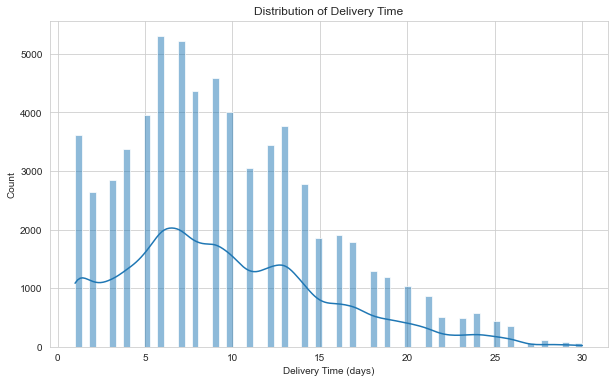

In [73]:
# Histogram of delivery time
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time'].dropna(), kde=True)
plt.xlabel('Delivery Time (days)')
plt.ylabel('Count')
plt.title('Distribution of Delivery Time')
plt.show()

Bar plots can display the average review score for each category of delivery time, 
providing a straightforward comparison of customer satisfaction across different time intervals.

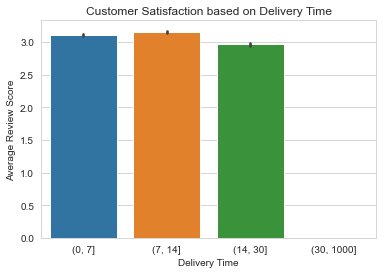

In [74]:
sns.barplot(x=pd.cut(df['delivery_time'], bins=[0, 7, 14, 30, 1000]),
            y=df['review_score'])
plt.xlabel('Delivery Time')
plt.ylabel('Average Review Score')
plt.title('Customer Satisfaction based on Delivery Time')
plt.show()

In [75]:
# Correlation analysis
correlation = df['delivery_time'].corr(df['review_score'])
print("Correlation between delivery time and review score:", correlation)

Correlation between delivery time and review score: -0.02084947243350753


In [76]:
# Calculate order frequency per customer
order_frequency = df.groupby('customer_id')['order_id'].nunique().reset_index()
order_frequency = order_frequency.rename(columns={'order_id': 'order_frequency'})

In [77]:
 order_frequency.head()

,customer_id,order_frequency
0,0,1
1,1,1
2,4,1
3,5,1
4,6,1


In [78]:

df = pd.merge(df, order_frequency, on='customer_id')

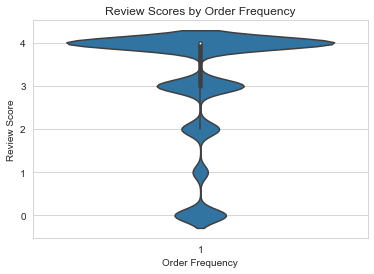

In [79]:
 # Create a violin plot to visualize the distribution of review scores by order frequency
sns.violinplot(x='order_frequency', y='review_score', data=df)
plt.title('Review Scores by Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Review Score')
plt.show()

From the chart we can see that the majority of customers who leave a review have only made one order, and the majority of these customers have given a 4.5 star review.

In [80]:
 # Create price range categories
import numpy as np
price_ranges = pd.cut(df['price'], bins=[0, 50, 100, 500, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
df['price_range'] = price_ranges

In [81]:
price_ranges.head()

0         High
1         High
2         High
3    Very High
4    Very High
Name: price, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [82]:
# Create crosstab of review scores by price range
price_review_crosstab = pd.crosstab(df['review_score'], df['price_range'])

 

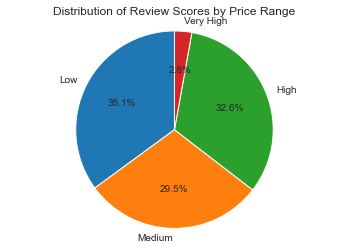

In [83]:
# Plot pie chart of review scores by price range
plt.pie(price_review_crosstab.sum(), labels=price_review_crosstab.columns, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review Scores by Price Range')
plt.axis('equal')
plt.show()

Above graph suggests that most reviews are associated with products in the low price range. 

In [84]:
# Create a new column for the order quantity range
quantity_ranges = [1, 2, 3, 4, 5, 10, 20, df['order_item_id'].max()]
quantity_labels = ['1', '2', '3', '4', '5-10', '11-20', '>20']
df['order_quantity_range'] = pd.cut(df['order_item_id'], quantity_ranges, labels=quantity_labels)
df.isnull().sum()


review_id                     0
order_id                      0
review_score                  0
review_comment_title          0
review_comment_message        0
                          ...  
review_answer_day             0
delivery_time                 0
order_frequency               0
price_range                   0
order_quantity_range      57406
Length: 65, dtype: int64

In [85]:
df['order_quantity_range'].fillna(df['order_quantity_range'].mode()[0], inplace=True)
df.isnull().sum()


review_id                 0
order_id                  0
review_score              0
review_comment_title      0
review_comment_message    0
                         ..
review_answer_day         0
delivery_time             0
order_frequency           0
price_range               0
order_quantity_range      0
Length: 65, dtype: int64

In [86]:
# Group the dataframe by price range, quantity range, and calculate the average review score
grouped = df.groupby(['price_range', 'order_quantity_range'])['review_score'].mean()


In [87]:
# Reset the index of the resulting dataframe
grouped = grouped.reset_index()

In [88]:
# Create a pivot table for visualization
pivot_table = grouped.pivot('order_quantity_range', 'price_range', 'review_score')

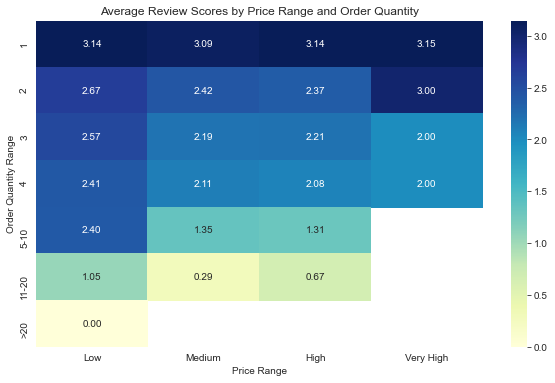

In [89]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title('Average Review Scores by Price Range and Order Quantity')
plt.xlabel('Price Range')
plt.ylabel('Order Quantity Range')
plt.show()


In [90]:
 grouped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   price_range           28 non-null     category
 1   order_quantity_range  28 non-null     category
 2   review_score          23 non-null     float64 
dtypes: category(2), float64(1)
memory usage: 968.0 bytes


In [91]:
df.isnull().sum()


review_id                 0
order_id                  0
review_score              0
review_comment_title      0
review_comment_message    0
                         ..
review_answer_day         0
delivery_time             0
order_frequency           0
price_range               0
order_quantity_range      0
Length: 65, dtype: int64

In [92]:
#To select features that are necessary for data modeling in the Olist dataset using correlation analysis

In [93]:
df=df[['order_status','payment_type','payment_value','customer_city','price',
     'freight_value','product_category_name_english','order_month','order_day_of_week','order_hour_of_day','delivery_time',
     'price_range','order_quantity_range','review_score']]

In [94]:
# Specify the file path where you want to save the merged CSV
file_path = "C:\olist_data\df.csv"
df.to_csv(file_path, index=False)


In [95]:
x=df[['order_status','payment_type','payment_value','customer_city','price',
     'freight_value','product_category_name_english','order_month','order_day_of_week','order_hour_of_day','delivery_time',
     'price_range','order_quantity_range']]
y = df['review_score']  

In [96]:
correlation_matrix = x.corr()

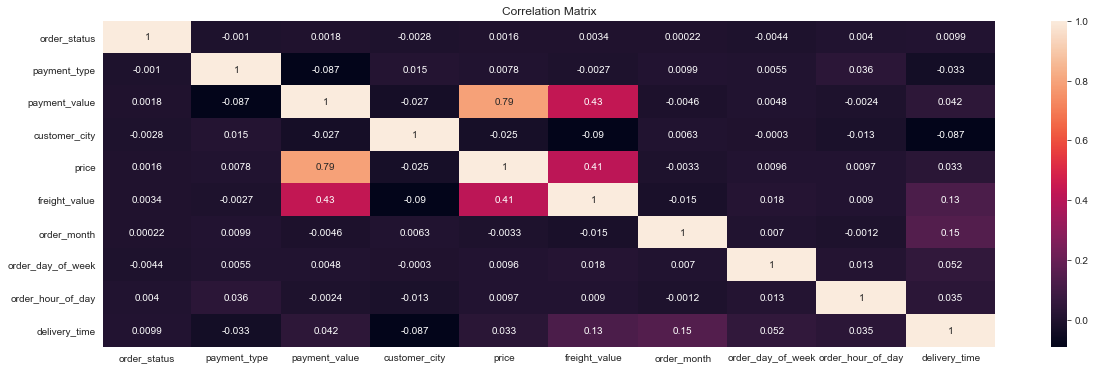

In [97]:
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [98]:
threshold = 0.7
# Get the pairs of highly correlated features
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(pair)

('payment_value', 'price')


In [99]:
data=df[['payment_type','customer_city',
     'freight_value','product_category_name_english','order_month','order_day_of_week','order_hour_of_day','delivery_time',
     'order_quantity_range','price','review_score']]

In [100]:
corr_matrix =data.corr()
corr_matrix['review_score'].sort_values(ascending=False)

review_score         1.000000
order_month          0.023834
customer_city        0.010140
order_hour_of_day    0.007285
price                0.004754
payment_type        -0.004696
delivery_time       -0.020849
order_day_of_week   -0.023900
freight_value       -0.034356
Name: review_score, dtype: float64

In [101]:
x=df[['payment_type','customer_city',
     'freight_value','product_category_name_english','order_month','order_day_of_week','order_hour_of_day','delivery_time',
     'order_quantity_range','price']]
y = df['review_score']  

In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65521 entries, 0 to 65520
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_type                   65521 non-null  int32   
 1   customer_city                  65521 non-null  int32   
 2   freight_value                  65521 non-null  float64 
 3   product_category_name_english  65521 non-null  object  
 4   order_month                    65521 non-null  int64   
 5   order_day_of_week              65521 non-null  int64   
 6   order_hour_of_day              65521 non-null  int64   
 7   delivery_time                  65521 non-null  int64   
 8   order_quantity_range           65521 non-null  category
 9   price                          65521 non-null  float64 
dtypes: category(1), float64(2), int32(2), int64(4), object(1)
memory usage: 6.6+ MB


In [103]:
 df['order_day_of_week']

0        4
1        4
2        3
3        2
4        1
        ..
65516    1
65517    1
65518    1
65519    5
65520    7
Name: order_day_of_week, Length: 65521, dtype: int64

In [104]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65521 entries, 0 to 65520
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_type                   65521 non-null  int32   
 1   customer_city                  65521 non-null  int32   
 2   freight_value                  65521 non-null  float64 
 3   product_category_name_english  65521 non-null  object  
 4   order_month                    65521 non-null  int64   
 5   order_day_of_week              65521 non-null  int64   
 6   order_hour_of_day              65521 non-null  int64   
 7   delivery_time                  65521 non-null  int64   
 8   order_quantity_range           65521 non-null  category
 9   price                          65521 non-null  float64 
dtypes: category(1), float64(2), int32(2), int64(4), object(1)
memory usage: 6.6+ MB


In [105]:
 #converting categorical varaible to numeric 
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['freight_value','product_category_name_english','order_quantity_range']:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

<ipython-input-105-08578c2d3d64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])


In [106]:
# model building  

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
from sklearn.metrics import mean_squared_error,r2_score

In [108]:
 # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [109]:
# Model 1: Linear Regression
model = LinearRegression()
model.fit(x_train,y_train) 
y_pred=model.predict(x_test)

In [110]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [111]:
# Lower MSE values and higher R2 scores indicate better model performance.
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1.7879372464123533
Root Mean Squared Error (RMSE): 1.3371377066003163
R-squared (R2) Score: 0.015924472175747995


In [112]:
from sklearn.tree import DecisionTreeRegressor
# Train the decision tree regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
# Predict on the test set
dt_pred = dt_model.predict(x_test)

In [113]:
# Calculate evaluation metrics
dt_mse = mean_squared_error(y_test,dt_pred) 
dt_rmse = np.sqrt(mse)
dt_r2 = r2_score(y_test,dt_pred)

In [114]:
# Lower MSE values and higher R2 scores indicate better model performance.
print("Mean Squared Error (MSE):",dt_mse)
print("Root Mean Squared Error (RMSE):",dt_rmse)
print("R-squared (R2) Score:",dt_r2)

Mean Squared Error (MSE): 2.719069810297259
Root Mean Squared Error (RMSE): 1.3371377066003163
R-squared (R2) Score: -0.49656821800005657


In [115]:
# Compare and select the best-performing model
if rmse <dt_rmse:
    selected_model = linear_model
    print("Linear Regression selected as the best model.")
else:
    selected_model = dt_model
    print("Decision Tree Regressor selected as the best model.")

Decision Tree Regressor selected as the best model.


In [116]:
from sklearn.svm import SVR

In [117]:
# Coefficients(Slope) and intercept
coefficients =model.coef_
intercept =model.intercept_

MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

For root mean square error Small value indicates better model. Value lies between 0 to ∞
 

In [118]:
x=df[['customer_city','freight_value','order_month','order_day_of_week','delivery_time']]
y = df['review_score'] 

In [119]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65521 entries, 0 to 65520
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_city      65521 non-null  int32  
 1   freight_value      65521 non-null  float64
 2   order_month        65521 non-null  int64  
 3   order_day_of_week  65521 non-null  int64  
 4   delivery_time      65521 non-null  int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 4.8 MB


In [120]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['freight_value']:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

<ipython-input-120-27288fdebc33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])


In [121]:
 # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [122]:
 # Model 1: Linear Regression
model = LinearRegression()
model.fit(x_train,y_train) 
y_pred=model.predict(x_test)


In [123]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [124]:
# Lower MSE values and higher R2 scores indicate better model performance.
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.810185994715775
Root Mean Squared Error (RMSE): 1.3454315273233992
R-squared (R2) Score: 0.003678824978648798


In [125]:
from sklearn.tree import DecisionTreeRegressor
# Train the decision tree regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
# Predict on the test set
dt_pred = dt_model.predict(x_test)

In [126]:
# Calculate evaluation metrics
dt_mse = mean_squared_error(y_test,dt_pred) 
dt_rmse = np.sqrt(mse)
dt_r2 = r2_score(y_test,dt_pred)

In [127]:
# Lower MSE values and higher R2 scores indicate better model performance.
print("Mean Squared Error (MSE):",dt_mse)
print("Root Mean Squared Error (RMSE):",dt_rmse)
print("R-squared (R2) Score:",dt_r2)

Mean Squared Error (MSE): 2.5184519328004704
Root Mean Squared Error (RMSE): 1.3454315273233992
R-squared (R2) Score: -0.38614871413616036


In [128]:
x=df[['product_category_name_english','order_month','order_day_of_week','order_hour_of_day','delivery_time']]
y = df['review_score']  

In [129]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65521 entries, 0 to 65520
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name_english  65521 non-null  object
 1   order_month                    65521 non-null  int64 
 2   order_day_of_week              65521 non-null  int64 
 3   order_hour_of_day              65521 non-null  int64 
 4   delivery_time                  65521 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 5.0+ MB


In [130]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['product_category_name_english']:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

<ipython-input-130-f8b41fbb6a78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])


In [131]:
 # Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [132]:
 # Model 1: Linear Regression
model = LinearRegression()
model.fit(x_train,y_train) 
y_pred=model.predict(x_test)

In [133]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [134]:
# Lower MSE values and higher R2 scores indicate better model performance.
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.8111003667946215
Root Mean Squared Error (RMSE): 1.3457712906711234
R-squared (R2) Score: 0.0031755572113241204


In [135]:
def convert_to_category(review_score):
    if review_score <= 2:
        return "Unsatisfied"
    else:
        return "Satisfied"

In [136]:
df['review_category'] =df['review_score'].apply(convert_to_category)

In [137]:
df=df[['payment_type','customer_city',
     'freight_value','product_category_name_english','order_month','order_day_of_week','order_hour_of_day','delivery_time',
     'order_quantity_range','price','review_category']]

In [138]:
# Specify the file path where you want to save the merged CSV
file_path = "C:\olist_data\df.csv"
df.to_csv(file_path, index=False)

In [139]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report 

In [140]:
x=df[['payment_type','customer_city',
     'freight_value','product_category_name_english','order_month','order_day_of_week','order_hour_of_day','delivery_time',
     'order_quantity_range','price']]
y=df['review_category']

In [141]:
 #converting categorical varaible to numeric 
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['freight_value','product_category_name_english','order_quantity_range']:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le

<ipython-input-141-08578c2d3d64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**SVM**

a)linear kernel

In [143]:
from sklearn import svm

svm_model_a=svm.SVC(kernel='linear',class_weight='balanced')
#ft the model
svm_model_a.fit(x_train,y_train)

predictions_svm_a=svm_model_a.predict(x_test)

#Model evaluation
svm_confusion_matrix_a=metrics.confusion_matrix(y_test,predictions_svm_a)
svm_acc_score_a=metrics.accuracy_score(y_test,predictions_svm_a)*100
print("Confuction matrix:\n",svm_confusion_matrix_a)
print("******************************************************************")
print("Accuracy:\n",svm_acc_score_a)
print("*******************************************************************")
print("Classification Report:\n",metrics.classification_report(y_test,predictions_svm_a))

b)rbf kernel

Naive bayes classifier

In [144]:
nb_classifier =GaussianNB()
nb_classifier.fit(x_train, y_train)
prediction_1=nb_classifier.predict(x_test)

In [145]:
 from sklearn import metrics

In [146]:
#Model evaluation
nb_confusion_matrix=metrics.confusion_matrix(y_test,prediction_1)
nb_acc_score=metrics.accuracy_score(y_test,prediction_1)*100
print("Confustion matrix:\n",nb_confusion_matrix)
print("***********************************************")
print("Accuracy:\n",nb_acc_score)
print("*******************************************************************")
print("Classification Report:\n",metrics.classification_report(y_test,prediction_1))

Confustion matrix:
 [[9804  282]
 [2815  204]]
***********************************************
Accuracy:
 76.3677985501717
*******************************************************************
Classification Report:
               precision    recall  f1-score   support

   Satisfied       0.78      0.97      0.86     10086
 Unsatisfied       0.42      0.07      0.12      3019

    accuracy                           0.76     13105
   macro avg       0.60      0.52      0.49     13105
weighted avg       0.69      0.76      0.69     13105



In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
# Create an instance of the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(x_train, y_train)

# Make predictions on the testing data
prediction_2= classifier.predict(x_test)


In [149]:
#Model evaluation
dt_confusion_matrix=metrics.confusion_matrix(y_test,prediction_2)
dt_score=metrics.accuracy_score(y_test,prediction_2)*100
print("Confustion matrix:\n",dt_confusion_matrix)
print("***********************************************")
 
print("Accuracy:\n",dt_score)
print("*******************************************************************")
print("Classification Report:\n",metrics.classification_report(y_test,prediction_2))

Confustion matrix:
 [[8153 1933]
 [1597 1422]]
***********************************************
Accuracy:
 73.06371613887829
*******************************************************************
Classification Report:
               precision    recall  f1-score   support

   Satisfied       0.84      0.81      0.82     10086
 Unsatisfied       0.42      0.47      0.45      3019

    accuracy                           0.73     13105
   macro avg       0.63      0.64      0.63     13105
weighted avg       0.74      0.73      0.74     13105



In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
lrmodel=LogisticRegression() 

In [152]:
#fit the model
lrmodel.fit(x_train,y_train)
prediction3=lrmodel.predict(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
from sklearn import metrics

In [154]:
#Model evaluation
lr_confusion_matrix=metrics.confusion_matrix(y_test,prediction3)
lr_acc_score=metrics.accuracy_score(y_test,prediction3)*100
print("******************************************************************")
print("Confustion matrix:\n",lr_confusion_matrix)
print("***********************************************")
print("Accuracy:\n",lr_acc_score)
print("*******************************************************************")
print("Classification Report:\n",metrics.classification_report(y_test,prediction3))

******************************************************************
Confustion matrix:
 [[10086     0]
 [ 3019     0]]
***********************************************
Accuracy:
 76.96299122472338
*******************************************************************


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

   Satisfied       0.77      1.00      0.87     10086
 Unsatisfied       0.00      0.00      0.00      3019

    accuracy                           0.77     13105
   macro avg       0.38      0.50      0.43     13105
weighted avg       0.59      0.77      0.67     13105



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
# Get the coefficients of the variables
coefficients =lrmodel.coef_[0]
variable_weights = pd.DataFrame({'Variable': x.columns, 'Weight':coefficients})
print(variable_weights)

                        Variable    Weight
0                   payment_type -0.007035
1                  customer_city -0.000091
2                  freight_value  0.000044
3  product_category_name_english -0.005219
4                    order_month -0.048667
5              order_day_of_week -0.013410
6              order_hour_of_day -0.023916
7                  delivery_time -0.005318
8           order_quantity_range  0.019734
9                          price -0.000414


In [156]:
x2=df[["order_month","order_day_of_week","order_hour_of_day","order_quantity_range"]]

In [157]:
 #converting categorical varaible to numeric 
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in ['order_quantity_range']:
    le = LabelEncoder()
    x2[col] = le.fit_transform(x2[col])
    label_encoders[col] = le

<ipython-input-157-5f215626c328>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[col] = le.fit_transform(x2[col])


In [158]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [159]:
lrmodel2=LogisticRegression() 
#fit the model
lrmodel2.fit(x_train,y_train)
prediction4=lrmodel2.predict(x_test)

In [160]:
#Model evaluation
lr2_confusion_matrix=metrics.confusion_matrix(y_test,prediction4)
lr2_acc_score=metrics.accuracy_score(y_test,prediction4)*100
print("******************************************************************")
print("Confustion matrix:\n",lr2_confusion_matrix)
print("***********************************************")
print("Accuracy:\n",lr2_acc_score)
print("*******************************************************************")
print("Classification Report:\n",metrics.classification_report(y_test,prediction4))

******************************************************************
Confustion matrix:
 [[10039    47]
 [ 2971    48]]
***********************************************
Accuracy:
 76.97062190003815
*******************************************************************
Classification Report:
               precision    recall  f1-score   support

   Satisfied       0.77      1.00      0.87     10086
 Unsatisfied       0.51      0.02      0.03      3019

    accuracy                           0.77     13105
   macro avg       0.64      0.51      0.45     13105
weighted avg       0.71      0.77      0.68     13105



In [161]:
models=pd.DataFrame({'Model':['Decision Tree','Logistic Regression','Naive Bayes Classifier','LR2'],
                    'Accuracy':[dt_score,lr_acc_score,nb_acc_score,lr2_acc_score]})
models.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
3,LR2,76.970622
1,Logistic Regression,76.962991
2,Naive Bayes Classifier,76.367799
0,Decision Tree,73.063716
